#### Paquetes necesarios

In [30]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

#### Carga la imagen y convierte a RGB

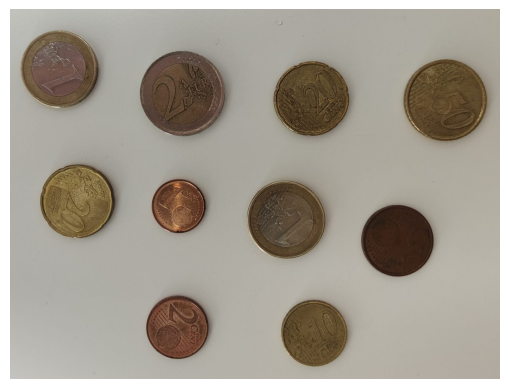

In [31]:
# Carga imagen ejemplo con monedas
img = cv2.imread('Images/monedas-personal-1.jpg') 

# OpenCV lee las imágenes en BGR, por lo que convertimos para visualizar RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

#### Conversión de la imagen a escala de grises y umbralización

Text(0.5, 1.0, 'FIJO invertida')

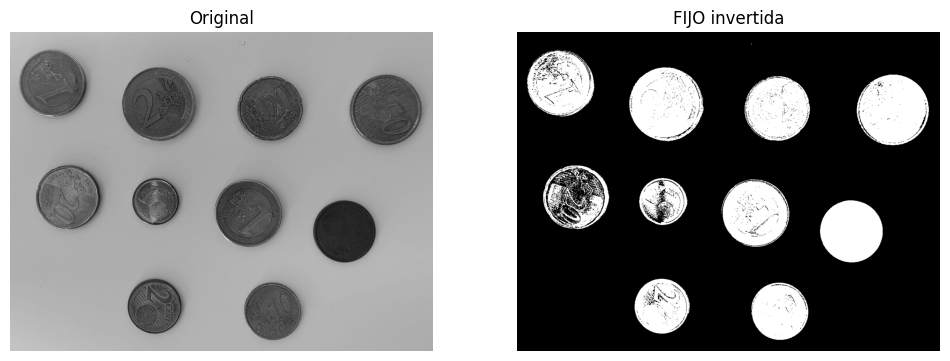

In [32]:
# Convierte la imagen a tonos de gris
img_gris = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Umbral fijo
umbral = 105

# Umbralizado binario invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)

# Creación de la figura
fig = plt.figure(figsize=(12, 6)) 

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

#### Obtención de los contornos (Número total de monedas)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Monedas totales:  10


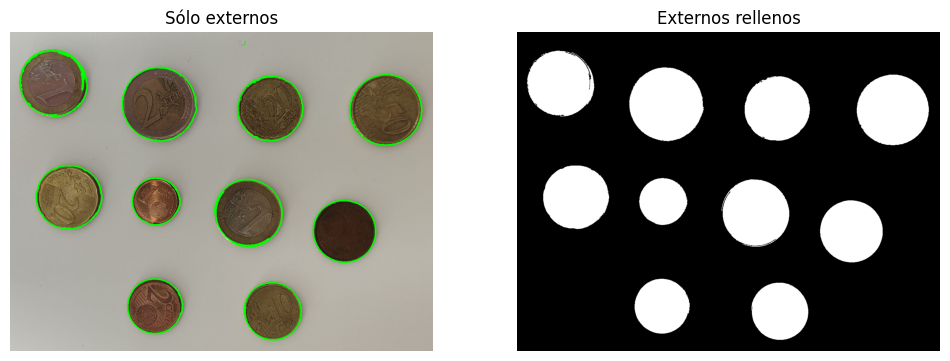

In [33]:
# Obtiene únicamente los contornos externos
contornos, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

# Creación de la figura
fig_contornos = plt.figure(figsize=(12, 6)) 

plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

# Variable que almacena el número total de monedas
monedas_totales = 0

# Lista en la que se almacenan los contornos correspondientes a monedas
lista_monedas = []

# Creación de imagen negra para dibujar los contornos
img_cont = np.zeros(img_rgb.shape)

for c in contornos:
    # Área del contorno
    area = cv2.contourArea(c)

    # Contenedor alineado con ejes de la imagen
    x, y, w, h = cv2.boundingRect(c)

    # Mínimo círculo que lo contiene
    (cx, cy), radio_contorno = cv2.minEnclosingCircle(c)

    # Calcula el área de un círculo ideal con el radio del mínimo círculo
    area_circulo_ideal = np.pi * (radio_contorno ** 2)

    # Umbral para la comparación del área del contorno y el área del círculo ideal
    umbral_area = 0.9  

    # Calcula la relación de aspecto
    relacion_aspecto = w / h

    # Umbral para la relación de aspecto
    umbral_aspecto = 0.9 

    # Verifica si el contorno se asemeja a un círculo
    if (area / area_circulo_ideal > umbral_area) and np.isclose(relacion_aspecto, 1.0, rtol=umbral_aspecto):
        # Contorno se añade a la lista porque es una moneda
        lista_monedas.append(c)

        # Se incrementa el número de monedas
        monedas_totales += 1

        # Dibuja el contorno en la imagen
        cv2.drawContours(img_cont, [c], -1, (255, 255, 255), -1)
        
# Visualización de monedas totales
print("\nMonedas totales: ", monedas_totales)

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()

#### Proporciones y valores reales de las monedas 

In [34]:
# Proporciones de las monedas con respecto a la de 1 euro
proporciones = {'1cts': 1.429889298892989,'2cts': 1.24, '5cts': 1.094117647058824,'10cts': 1.177215189873418, 
                '20cts': 1.044943820224719, '50cts': 0.9587628865979381, '1euro': 1, '2euro': 0.9029126213592233}

# Valores de las monedas
valores = {'1cts': 0.01,'2cts': 0.02, '5cts': 0.05,'10cts': 0.10, '20cts': 0.20, '50cts': 0.50, '1euro': 1, '2euro': 2}

# Diccionario para almacenar diámetros calculados
diametros_calculados = {}

#### Obtención del diámetro de la moneda de 1 Euro

In [39]:
# Función para manejar el evento de clic del ratón
def clic_en_moneda(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:

        global diametro

        # Encuentra el círculo haciendo clic
        for moneda in lista_monedas:
            (cx, cy), radio = cv2.minEnclosingCircle(moneda)

            # Calcula la distancia entre el punto de clic y el centro del círculo
            distancia = np.sqrt((x - cx) ** 2 + (y - cy) ** 2)

            if distancia < radio:
                # Hizo clic en este círculo
                # Calcula el área, radio y diámetro
                area = np.pi * radio ** 2
                diametro = 2 * radio

                # Muestra el diámetro de la moneda
                print(f'Diámetro de la moneda de 1 Euro: {diametro}')

                break

# Configurar la función para manejar clics del ratón
cv2.namedWindow('Imagen con monedas')
cv2.setMouseCallback('Imagen con monedas', clic_en_moneda)

# Mostrar la imagen y esperar a que se haga clic
cv2.imshow('Imagen con monedas', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

Diámetro de la moneda de 1 Euro: 209.1563720703125


#### Cálculo de las proporciones del resto de monedas

In [40]:
# Cálculo de los diámetros de las monedas
for clave, valor in proporciones.items():
    diametros_calculados[clave] = diametro / valor

print(diametros_calculados)

{'1cts': 146.27452085433467, '2cts': 168.67449360509073, '5cts': 191.1644260857694, '10cts': 177.67046659736218, '20cts': 200.16039907804102, '50cts': 218.15234506258403, '1euro': 209.1563720703125, '2euro': 231.64630455099126}


#### Cálculo del dinero total


Dinero total: 5.08 euros



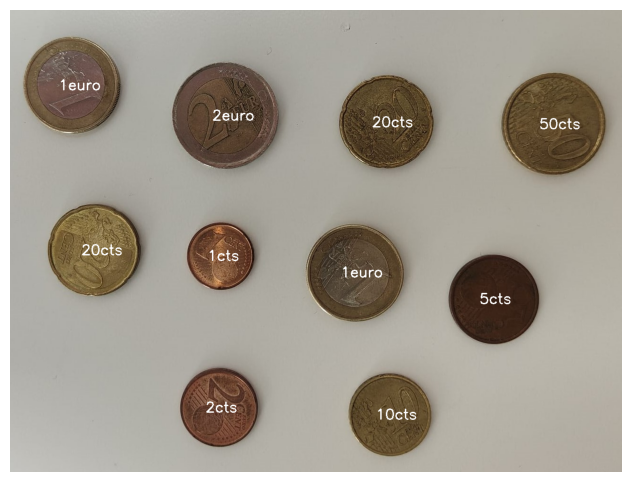

In [41]:
# Crea una copia de la imagen para no modificar la original
img_con_valores = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Variable para almacenar el dinero total
dinero_total = 0

for moneda in lista_monedas:
   
    (cx, cy), radio = cv2.minEnclosingCircle(moneda)
    
    nuevo_diametro = radio * 2

    # Variable que guarda la mínima diferencia entre diámetros calculados y monedas recorridas
    diferencia_minima = float('inf')  

    # Variable que guarda la moneda más cercana
    moneda_mas_cercana = None

    for moneda, proporcion in diametros_calculados.items():
        diferencia = abs(proporcion - nuevo_diametro)
        if diferencia < diferencia_minima:
            diferencia_minima = diferencia
            moneda_mas_cercana = moneda

    # Obtener el valor de la moneda más cercana
    valor_moneda = valores[moneda_mas_cercana]

    # Mostrar el valor en el centro de la moneda en la imagen
    cv2.putText(img_con_valores, f'{moneda_mas_cercana}', (int(cx) - 30, int(cy) + 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    
    # Suma el dinero total
    dinero_total += valores[moneda_mas_cercana]

print(f'\nDinero total: {dinero_total} euros\n')

# Mostrar la imagen con los valores en el centro de las monedas utilizando Matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(img_con_valores)
plt.axis('off')
plt.show()